In [1]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.preprocessing.text import * 
from tensorflow.keras.preprocessing.sequence import * 

In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("time")
    plt.ylabel("value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [3]:
def trend(time, slope=0):
    return slope * time

In [4]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
                   np.cos(season_time *2 * np.pi),
                   1/np.exp(3*season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time+phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

In [5]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [6]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    φ1 = 0.5
    φ2 = -0.1
    ar = rnd.randn(len(time) + 50)
    ar[:50] = 100
    for step in range(50, len(time) + 50):
        ar[step] += φ1 * ar[step - 50]
        ar[step] += φ2 * ar[step - 33]
    return ar[50:] * amplitude

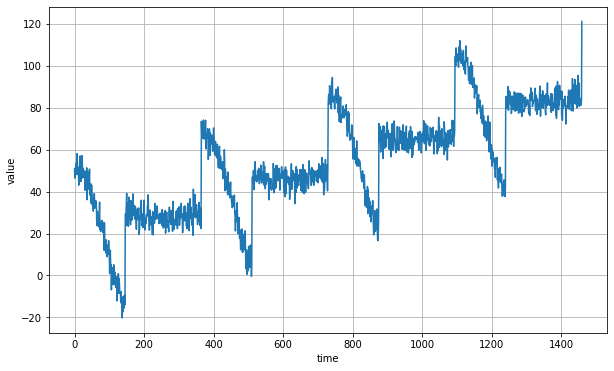

In [7]:
time = np.arange(4*365 +1, dtype='float32')
baseline = 10
series = trend(time, 0.1)
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 4
series = baseline + trend(time, slope) +seasonality(time, period=365, amplitude=amplitude)
series += white_noise(time, noise_level, seed=43)
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [10]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

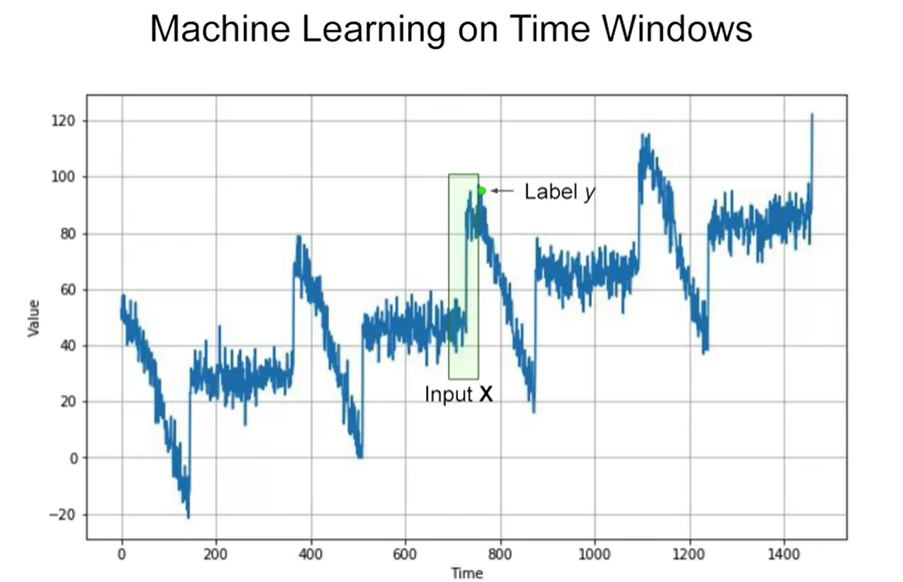

In [9]:
Image.open(r'C:\Users\44788/Desktop\it1.png')

line any supervised learning problem, need to determine the features and labels.
features will be a number of values - the number is called the window size.

In [22]:
# this functionality splits the data into arrays of windows
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True) # drop keeps no. values consistent
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
    print(window.numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [23]:
dataset = dataset.map(lambda window: (window[:-1], window[-1:])) # splits data into training and labels
dataset = dataset.shuffle(buffer_size=10) # shuffles data
for x, y in dataset:
    print(x.numpy(), y.numpy())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[5 6 7 8] [9]
[3 4 5 6] [7]
[2 3 4 5] [6]
[0 1 2 3] [4]
[1 2 3 4] [5]
[4 5 6 7] [8]


In [24]:
# now batch the data...
dataset = dataset.batch(2).prefetch(1)
for x, y in dataset:
    print(x.numpy(), y.numpy())

[[2 3 4 5]
 [1 2 3 4]] [[6]
 [5]]
[[4 5 6 7]
 [5 6 7 8]] [[8]
 [9]]
[[3 4 5 6]
 [0 1 2 3]] [[7]
 [4]]


In [11]:
# lets make this into a function...
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series) # convert series to tf object - dataset
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True) # define window and slice
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1)) # flatten data  
    dataset = dataset.shuffle(shuffle_buffer) # shiffles data
    dataset = dataset.map(lambda window: (window[:-1], window[-1])) # split data labels
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [12]:
spit_time = 1000
time_train = time[:spit_time]
x_train = series[:split_time]
time_val = time[spit_time:]
x_val = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000
train = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
validation = windowed_dataset(x_val, window_size, batch_size, shuffle_buffer_size)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

In [11]:
# define layer seperately so its easier to refer to... 
l0 = Dense(1, input_shape=[window_size])
model = Sequential([l0])

In [14]:
model.compile(loss="mse", optimizer=SGD(lr=1e-6, momentum=0.9))
model.fit(train, epochs=100, verbose=0, validation_data=validation)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [13]:
print("Layer weights {}".format(l0.get_weights()))

Layer weights [array([[-4.6234112e-02],
       [ 1.1803627e-01],
       [-2.1943072e-02],
       [-9.0804830e-02],
       [ 7.7028079e-03],
       [-4.5460430e-03],
       [-6.3377060e-03],
       [-4.7521595e-02],
       [ 1.2906024e-01],
       [-7.9614654e-02],
       [ 9.3624324e-02],
       [-7.0242792e-02],
       [-3.5923318e-04],
       [ 6.5397359e-02],
       [-1.5602279e-02],
       [ 4.3518640e-02],
       [-1.0989841e-01],
       [ 1.7478360e-02],
       [-3.5545179e-03],
       [ 6.8146527e-02],
       [-1.0654644e-01],
       [-8.3431555e-03],
       [ 8.4962152e-02],
       [-4.6408258e-02],
       [ 1.6730291e-01],
       [-1.1523943e-01],
       [ 1.2408580e-01],
       [ 5.3638231e-02],
       [ 3.2017562e-01],
       [ 4.8978239e-01]], dtype=float32), array([0.01638941], dtype=float32)]


In [18]:
model.predict(series[1:31][np.newaxis])

array([[43.840187]], dtype=float32)

In [20]:
forecast = []
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))
forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

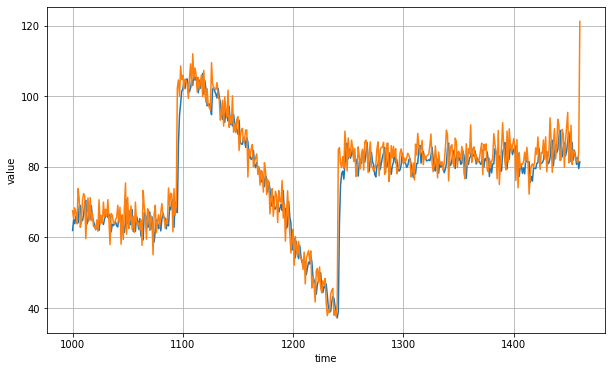

In [34]:
plt.figure(figsize=(10,6))
plot_series(time_valid, results)
plot_series(time_valid, x_val)
plt.show()

In [16]:
# now a deep network

model = Sequential([
    Dense(10, input_shape=[window_size], activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])

lr_schedule = LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

model.compile(loss="mse", optimizer=SGD(lr=1e-8, momentum=0.9))
hustory = model.fit(train, epochs=100, verbose=0, callbacks=[lr_schedule])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(1e-08, 0.001, 0.0, 300.0)

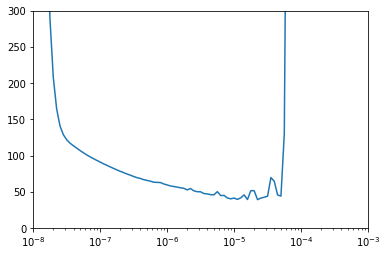

In [18]:
lrs = 1e-8 *(10**(np.arange(100)/20)) 
plt.semilogx(lrs, hustory.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [19]:
window_size = 30
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(lr=8e-6, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(dataset, epochs=500, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


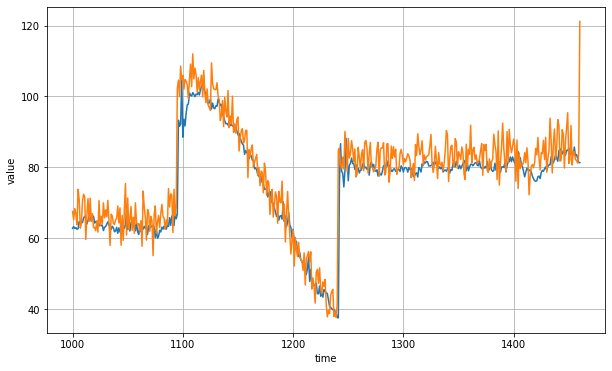

[40.04233169555664, 38.52899169921875, 39.07626724243164, 38.92893981933594, 38.85150909423828, 39.43372344970703, 39.27381896972656, 38.706878662109375, 40.67287826538086, 37.50680160522461, 35.7612419128418, 39.39781188964844, 35.398284912109375, 36.33494567871094, 36.018375396728516, 34.480552673339844, 36.667015075683594, 34.01636505126953, 34.5890007019043, 35.26026153564453, 34.591590881347656, 35.22639846801758, 35.68464660644531, 34.35573196411133, 33.91176223754883, 35.478424072265625, 36.958885192871094, 32.85393524169922, 33.39419937133789, 36.981781005859375, 37.89369201660156, 32.78312301635742, 31.913806915283203, 31.74056625366211, 34.01582717895508, 32.26889419555664, 31.885482788085938, 33.22852325439453, 31.90871810913086, 31.95504379272461, 31.197954177856445, 31.227018356323242, 31.75205421447754, 31.635669708251953, 31.118335723876953, 30.99544906616211, 35.58932113647461, 31.01419448852539, 30.38559341430664, 30.66056251525879, 30.175209045410156, 30.2751159667968

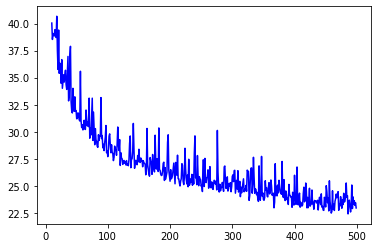

In [20]:
forecast = []
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))
forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10,6))
plot_series(time_valid, results)
plot_series(time_valid, x_val)
plt.show()

# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
print(plot_loss)
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()